In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

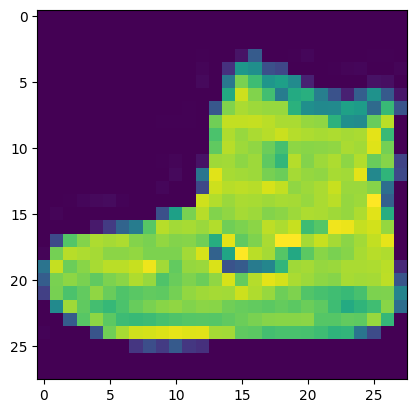

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0:
  return x

else:
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4920 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3705 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3345 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3095 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2894 - accuracy: 0.8921


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8763


[0.34647342562675476, 0.8762999773025513]

Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.9595320e-06 2.1684996e-06 1.4299021e-06 4.4232721e-07 3.0778281e-07 1.9658541e-03 1.3746094e-06 5.8313277e-02 4.3954959e-04 9.3927348e-01]


E1Q1: What does this list represent?
It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes

In [ ]:
print(test_labels[0])

9


The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

E1Q2: How do you know that this list tells you that the item is an ankle boot?
There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list



Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4724
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3597
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3187
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2998
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.9570027e-06 2.4444224e-08 1.4491229e-07 3.2459568e-09 7.3157871e-08 1.3605386e-03 1.1049792e-06 1.8877463e-02 8.0660948e-07 9.7975791e-01]
9


E2Q1: Increase to 1024 Neurons -- What's the impact?
Training takes longer, but is more accurate
Training takes longer, but no impact on accuracy
Training takes the same time, but is more accurate

Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

Exercise 3:
E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?

Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5192
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3926
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3519
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3279
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[9.9758545e-06 2.0056183e-09 1.6999772e-07 3.0000444e-07 6.9336613e-07 8.6637959e-02 8.4557265e-05 1.2904860e-01 4.5186628e-04 7.8376585e-01]
9


Exercise 4:
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5135
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3922
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3553
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3316
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.2947765e-04 4.4082629e-08 2.5337058e-06 1.8868514e-07 2.2578219e-05 1.2668665e-01 2.3468565e-05 1.2712210e-01 6.6859587e-03 7.3922700e-01]
9


Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Answer
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # Add a layer here,
                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    # Add a layer here
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4694
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3605
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3212
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2970
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.2782399e-05 3.1909207e-05 1.4092832e-05 6.9050140e-05 4.0947366e-06 1.1636451e-01 2.7850027e-05 1.9782057e-01 1.8482865e-04 6.8547040e-01]
9


Exercise 6:
E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?
Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of model.evaluate() didn't improve much. It can even be slightly worse.

---This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5012
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3745
Epoch 3/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3379
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3125
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2959
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2819
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2680
Epoch 8/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2560
Epoch 9/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2454
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2375
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2302
Epoch 12/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2198
E

0.3376712203025818

Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 5.3378
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5509
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5155
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5062
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[3.6841268e-18 3.1215184e-25 4.2124056e-30 5.1339250e-25 7.5368688e-28 3.7346671e-03 3.4821726e-25 2.2366401e-03 6.8683572e-16 9.9402869e-01]
9


Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8325
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4730 - accuracy: 0.8325


Using Callbacks to Control Training

In [ ]:
# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4724 - accuracy: 0.8302
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8690
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3578 - accuracy: 0.8691


Shallow Neural Network
In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 30s 14ms/step - loss: 0.4995 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3754 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3392 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3139 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2967 - accuracy: 0.8904

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8760


Convolutional Neural Network
In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? One way is to use something called convolutions. We're not going into the details of convolutions in this notebook (please see resources in the classroom), but the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy.

If you've ever done image processing using a filter (like this, then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with Convolution and MaxPooling layers added first. It will take longer, but look at the impact on the accuracy.



In [ ]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a Conv2D layer. The parameters are:

The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
The size of the Convolution. In this case, a 3x3 grid.
The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
In the first layer, the shape of the input data.
You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
Then you added another convolution and flattened the output.

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),

After this, you'll just have the same DNN structure as the non convolutional version. The same dense layer with 128 neurons, and output layer with 10 neurons as in the pre-convolution example:

  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
About overfitting
Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called overfitting. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

Visualizing the Convolutions and Pooling
Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 49ms/step


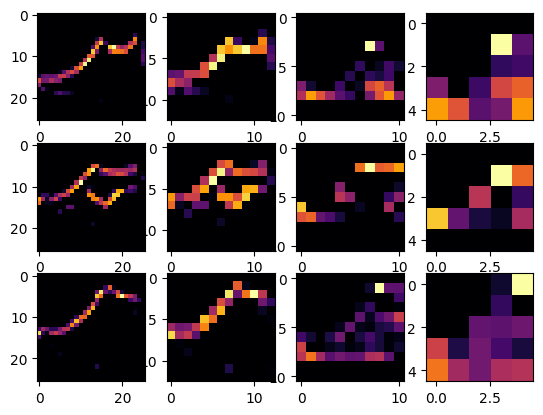

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)